# Pymaceuticals Inc.
---

### Analysis

- This project involved the examination of test results from a study that included 249 mice subjected to ten different drug treatments, along with a placebo/control group. The analysis aimed to uncover trends, patterns, and draw insights that could inform decisions pertaining to anti-cancer medications.
The examination of data from Pymaceuticals' recent animal study unveiled the following significant discoveries:
1. A positive correlation (correlation value of 0.84) was observed between the mice's weight and their tumor sizes.
2. Out of the four drug regimens examined, Capomulin and Ramicane were the most effective in reducing tumor sizes.
3. In contrast, the other two drug regimens, Infubinol and Ceftamin, displayed the lowest effectiveness in reducing tumor sizes.
 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_and_study = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_and_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [51]:
# Checking the number of mice.
unique_mice_count = mouse_and_study["Mouse ID"].nunique()
print(f"Number of Unique Mouse IDs: {unique_mice_count}")

Number of Unique Mouse IDs: 249


In [52]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = mouse_and_study.loc[mouse_and_study.duplicated(subset= ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicated_mice

array(['g989'], dtype=object)

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_id = mouse_and_study.loc[mouse_and_study["Mouse ID"]== "g989", :]
duplicated_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_and_study = mouse_and_study[mouse_and_study["Mouse ID"] != "g989"]
cleaned_mouse_and_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [55]:
# Checking the number of mice in the clean DataFrame.
unique_mice_clean_count = cleaned_mouse_and_study["Mouse ID"].nunique()
print(f"Number of Unique Mice in the Clean DataFrame: {unique_mice_clean_count}")

Number of Unique Mice in the Clean DataFrame: 248


## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_summary = mouse_and_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_summary = regimen_summary.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})
# Assemble the resulting series into a single summary DataFrame.
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary = mouse_and_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'mean', 'median': 'median', 'var': 'var', 'std': 'std', 'sem': 'sem'})
regimen_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

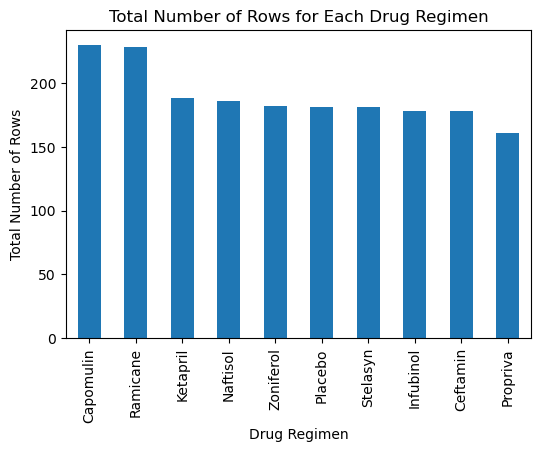

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mouse_and_study['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(6, 4))

# Add labels and a title
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

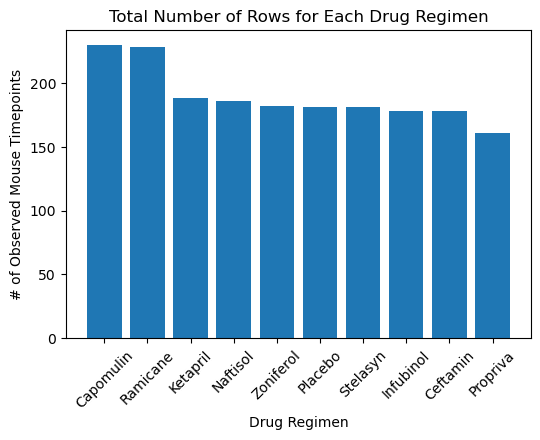

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = mouse_and_study['Drug Regimen'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(6, 4))
plt.bar(regimen_counts.index, regimen_counts.values)


plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')

# rotate x-axis labels for better readability 
plt.xticks(rotation=45)

# Show the plot
plt.show()

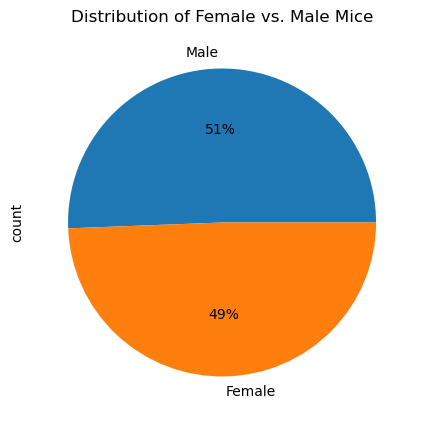

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gendered_mice = mouse_and_study['Sex'].value_counts()

rounded_gendered_mice = gendered_mice.round()

rounded_gendered_mice.plot(kind='pie', autopct='%1.0f%%', figsize=(6, 5))

plt.title('Distribution of Female vs. Male Mice')

plt.show()

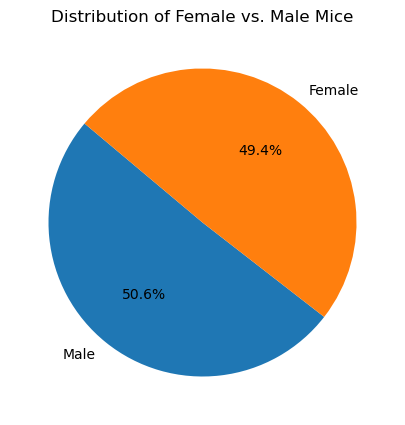

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distr = mouse_and_study['Sex'].value_counts()
rounded_gender_distr = gender_distr.round()

plt.figure(figsize=(6, 5))
plt.pie(rounded_gender_distr, labels=rounded_gender_distr.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Female vs. Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
selected_regimens_df = mouse_and_study[mouse_and_study["Drug Regimen"].isin(selected_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = selected_regimens_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, selected_regimens_df, on=["Mouse ID", "Timepoint"], how="left")[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

final_tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [63]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for treatment in treatments:
    treatment_filter = final_tumor_volume[final_tumor_volume["Drug Regimen"]== treatment]
    tumor_volume = treatment_filter["Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volume)

    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    potential_outliers = treatment_filter[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
   
    print(f"{treatment}'s potential outliers: {potential_outliers}\n")


Capomulin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []

Ramicane's potential outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []

Infubinol's potential outliers:    Mouse ID Drug Regimen  Tumor Volume (mm3)
15     c326    Infubinol           36.321346

Ceftamin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []



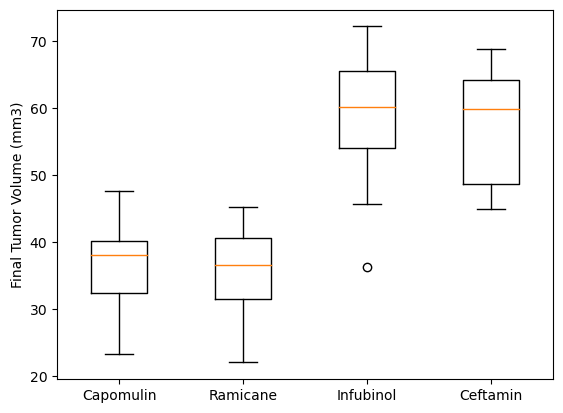

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [tumor_volume_data[0], tumor_volume_data[1], tumor_volume_data[2], tumor_volume_data[3]]

labels = treatments
plt.boxplot(data, labels=labels)

plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

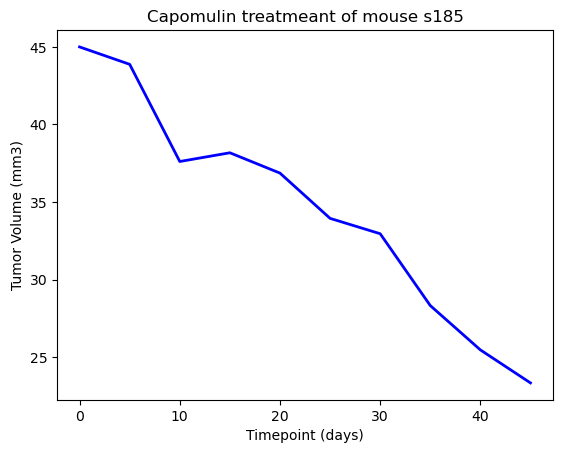

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse = cleaned_mouse_and_study.loc[cleaned_mouse_and_study["Drug Regimen"] == "Capomulin",:]

special = capomulin_mouse.loc[capomulin_mouse["Mouse ID"] == "s185",:]
special.head()
x_axis = special["Timepoint"]
tumsiz = special["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse s185')
plt.plot(x_axis, tumsiz,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

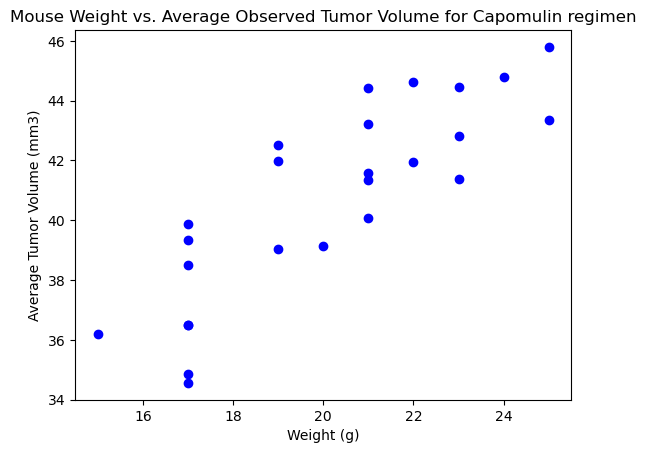

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mouse_and_study[cleaned_mouse_and_study["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
average_volume_df = pd.DataFrame({
    "Weight (g)": capomulin_data.groupby("Mouse ID")["Weight (g)"].mean(),
    "Average Tumor Volume (mm3)": average_tumor_volume
})
plt.scatter(average_volume_df["Weight (g)"], average_volume_df["Average Tumor Volume (mm3)"], marker = 'o', color= 'blue')
plt.title(f"Mouse Weight vs. Average Observed Tumor Volume for Capomulin regimen")
plt.xlabel(f"Weight (g)")
plt.ylabel(f"Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [68]:
import pandas as pd
from scipy.stats import linregress

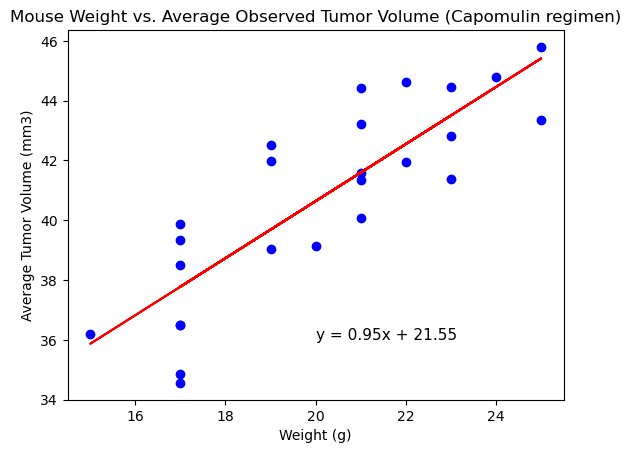

The correlation between mouse weight and the average tumor volume is 0.84


In [87]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Find Correlation 
correlation = average_volume_df["Weight (g)"].corr(average_volume_df["Average Tumor Volume (mm3)"])
#Find linear regression
slope, intercept, r_value, p_value, std_err = linregress(average_volume_df["Weight (g)"], average_volume_df["Average Tumor Volume (mm3)"])
#Create regression equation
regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(average_volume_df["Weight (g)"], average_volume_df["Average Tumor Volume (mm3)"], marker = 'o', color= 'blue')
plt.title(f"Mouse Weight vs. Average Observed Tumor Volume (Capomulin regimen)")
plt.xlabel(f"Weight (g)")
plt.ylabel(f"Average Tumor Volume (mm3)")
plt.plot(average_volume_df["Weight (g)"], slope * average_volume_df["Weight (g)"] + intercept, color='red')
plt.annotate(regression_equation,(20,36), fontsize=11)
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

